In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MoleculeList = [ 'hGCSF','hGH','MSA','BSA','HSA'] #, 'HSA', 'Her'


Folder_List = {  '3B2': './3B2/Plates', 'RBD': './RBDJ/Plates','hGH': './hGH/Plates',
              'hGCSF': './hGCSF/sHN49to57_64_89', 'HerA': './HerA/Plates','HSA': './HSA/Plates',
              'MSA': './MSA/Plates', 'BSA':'./BSA/Plates'} #'HSA': '/HSA/Plates', 'Her': 'HSA/sHN10to23', ,

Nr_list = { '3B2': [5], 'RBD': [5],'hGH': [6],'hGCSF': [5], 'HerA': [6],
               'HSA': [4], 'MSA': [2], 'BSA': [3]} # 'Her': 'HSA/sHN10to23',

version = {'3B2': ['V5'], 'RBD': ['V5'], 'hGH': ['V6'],'hGCSF': ['V5'],'HerA': ['V6'], 'HSA': ['V4'],
          'MSA': ['V2'], 'BSA': ['V3']}

Strain_ID = {'hGH': [44, 42], # + [63, 88] 
             'hGCSF': [53, 51], #+ [64, 89],
            'HSA': [2], 
             'MSA': [104, 107],
            'BSA': [70, 69]} #59,

cod_type = {}

cod_type['hGH'] = [  'Native','Arch1']
cod_type['hGCSF'] = ['Native' ,' Arch1']
cod_type['HSA'] = ['Native' ,' Arch1']
cod_type['MSA'] = ['Native' ,' Arch1']
cod_type['BSA'] = ['Native' ,' Arch1']

## SP

In [ ]:
Property = { 'hGCSF': 'SP','hGH': 'SP','HSA':'SP'}  
Nr = len(Nr_list)


Data = {}
Data_Grouped = {}
for m in MoleculeList:
    Data[m] = {}
    Data_Grouped[m]= {}
    for r in Nr_list[m]:
        Data[m][r] = pd.read_excel(Folder_List[m]+"/Titer_OD_Plate.xlsx", version[m][0])
        Data_Grouped[m][r] = {}
        Uniq_Exp = Data[m][r].iloc[:,0].unique() 
        for i in Uniq_Exp:
            Data_Grouped[m][r][i] = Data[m][r].loc[Data[m][r].iloc[:,0] == i, :]

# NameList = pd.read_excel("NameList.xlsx")

Avg_titer = {}
Avg_SP = {}
Data_collect = {}


for m in MoleculeList:
    cnt_r = 0
    Avg_titer[m] = {}
    Avg_SP[m] = {}
    Data_collect[m] = {}
    for r in Nr_list[m]:
        Avg_titer[m][r] = []
        Avg_SP[m][r] = []
        Data_collect[m] = {}
        for i in Strain_ID[m]:
            try:
                Avg_titer[m][r].append(np.mean(Data_Grouped[m][r]['sHN'+str(i)]['Titer']))
                Avg_SP[m][r].append(np.mean(Data_Grouped[m][r]['sHN'+str(i)][Property[m]]))
                if cnt_r == 0:
                    Data_collect[m][i] =  Data_Grouped[m][r]['sHN'+str(i)][Property[m]].values
                else:
                    Data_collect[m][i] = np.concatenate((Data_collect[m][i], 
                                                         Data_Grouped[m][r]['sHN'+str(i)][Property[m]].values), axis = 0)

            except KeyError:
                Avg_titer[m][r].append(np.nan)
                Avg_SP[m][r].append(np.nan)
                if cnt_r == 0:
                    Data_collect[m][i] = np.nan*np.ones((Data_Grouped[m][r]['sHN'+str(Strain_ID[m][0])][Property[m]].shape[0],))
                else:
                    Data_collect[m][i] = np.concatenate((Data_collect[m][i], 
                                                         np.nan*np.ones((Data_Grouped[m][r]['sHN'+str(Strain_ID[m][0])][Property[m]].shape[0],))), axis = 0)

                continue
            
        if m == 'HerA': 
            Avg_titer['HerA'][r].append(np.mean(Data_Grouped['HerA'][r]['S1312']['Titer']))
            Avg_SP['HerA'][r].append(np.mean(Data_Grouped['HerA'][r]['S1312'][Property['HerA']]))
            if cnt_r == 0:
                Data_collect['HerA']['S1312'] =  Data_Grouped['HerA'][r]['S1312'][Property['HerA']].values
            else:
                Data_collect['HerA']['S1312'] = np.concatenate((Data_collect['HerA'][i], 
                                                             Data_Grouped['HerA'][r]['S1312'][Property['HerA']].values), axis = 0)
        if m == 'HSA': 
            Avg_titer['HSA'][r].append(np.mean(Data_Grouped['HSA'][r]['S1311']['Titer']))
            Avg_SP['HSA'][r].append(np.mean(Data_Grouped['HSA'][r]['S1311'][Property['HSA']]))
            if cnt_r == 0:
                Data_collect['HSA']['S1311'] =  Data_Grouped['HSA'][r]['S1311'][Property['HSA']].values
            else:
                Data_collect['HSA']['S1311'] = np.concatenate((Data_Grouped['HSA'][r]['S1311'][Property['HSA']].values,
                                                              Data_collect['HSA'][i]), axis = 0)
    
    cnt_r = cnt_r + 1

In [ ]:
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (10, 3)
f, ax = plt.subplots(1, 3)

x = [[0, 0, 0], [0.5, 0.5, 0.5]]
x_new = [[0.5, 0.5, 0.5], [0, 0, 0]]
for i in range(3):
    m = MoleculeList[i]
    r = Nr_list[m]
    if m == 'HSA':
        barlist = ax[i].bar([0.5 , 0], Avg_SP[m][r[0]], width = 0.2,facecolor= 'gray', alpha = 1)
        ax[i].scatter(x_new,np.transpose(pd.DataFrame(Data_collect[m]).values) ,100, 'k')
        ax[i].set_yticks(np.arange(0, 10, 3),**hfont)
        ax[i].set_yticklabels(np.arange(0, 10, 3),**hfont)
        for bl in [0]:
            barlist[bl].set_color('firebrick')#'rosybrown'
    else:
        
        if i == 0:
            barlist = ax[i].bar([0 , 0.5], Avg_SP[m][r[0]], width = 0.2,facecolor= 'gray')
            ax[i].set_ylabel('Specific Productivity \n [mg/L/OD600]', **hfont)
            for bl in [1]:
                barlist[bl].set_color('firebrick')#'rosybrown'
        else:
            barlist = ax[i].bar([0 , 0.5], Avg_SP[m][r[0]], width = 0.2,facecolor= 'gray', alpha = 1)
            for bl in [1]:
                barlist[bl].set_color('firebrick')#'rosybrown'
        
        ax[i].scatter(x,np.transpose(pd.DataFrame(Data_collect[m]).values) ,100, 'k')
        if m == 'hGH':
            ax[i].set_yticks(np.arange(0, 22, 5),**hfont)
            ax[i].set_yticklabels(np.arange(0, 22, 5),**hfont)
        elif m == 'hGCSF':
            ax[i].set_yticks(np.arange(0, 10, 3),**hfont)
            ax[i].set_yticklabels(np.arange(0, 10, 3),**hfont)
    
    ax[i].set_xticks([0, 0.5], **hfont)
    ax[i].set_xticklabels(['Native', 'Picha-CLM'], rotation = 45, **hfont)
    
plt.savefig("Comparison_w_Native.pdf", dpi = 300, bbox_inches = "tight")  

### Titer

In [3]:
Property = { 'hGCSF': 'Titer','hGH': 'Titer','HSA':'Titer', 'MSA': 'Titer', 'BSA': 'Titer'}  
Nr = len(Nr_list)


Data = {}
Data_Grouped = {}
for m in MoleculeList:
    Data[m] = {}
    Data_Grouped[m]= {}
    for r in Nr_list[m]:
        Data[m][r] = pd.read_excel(Folder_List[m]+"/Titer_OD_Plate.xlsx", version[m][0])
        Data_Grouped[m][r] = {}
        Uniq_Exp = Data[m][r].iloc[:,0].unique() 
        for i in Uniq_Exp:
            Data_Grouped[m][r][i] = Data[m][r].loc[Data[m][r].iloc[:,0] == i, :]

# NameList = pd.read_excel("NameList.xlsx")

Avg_titer = {}
Avg_SP = {}
Data_collect = {}


for m in MoleculeList:
    cnt_r = 0
    Avg_titer[m] = {}
    Avg_SP[m] = {}
    Data_collect[m] = {}
    for r in Nr_list[m]:
        Avg_titer[m][r] = []
        Avg_SP[m][r] = []
        Data_collect[m] = {}
        for i in Strain_ID[m]:
            try:
                Avg_titer[m][r].append(np.mean(Data_Grouped[m][r]['sHN'+str(i)]['Titer']))
                Avg_SP[m][r].append(np.mean(Data_Grouped[m][r]['sHN'+str(i)][Property[m]]))
                if cnt_r == 0:
                    Data_collect[m][i] =  Data_Grouped[m][r]['sHN'+str(i)][Property[m]].values
                else:
                    Data_collect[m][i] = np.concatenate((Data_collect[m][i], 
                                                         Data_Grouped[m][r]['sHN'+str(i)][Property[m]].values), axis = 0)

            except KeyError:
                Avg_titer[m][r].append(np.nan)
                Avg_SP[m][r].append(np.nan)
                if cnt_r == 0:
                    Data_collect[m][i] = np.nan*np.ones((Data_Grouped[m][r]['sHN'+str(Strain_ID[m][0])][Property[m]].shape[0],))
                else:
                    Data_collect[m][i] = np.concatenate((Data_collect[m][i], 
                                                         np.nan*np.ones((Data_Grouped[m][r]['sHN'+str(Strain_ID[m][0])][Property[m]].shape[0],))), axis = 0)

                continue
            
        if m == 'HerA': 
            Avg_titer['HerA'][r].append(np.mean(Data_Grouped['HerA'][r]['S1312']['Titer']))
            Avg_SP['HerA'][r].append(np.mean(Data_Grouped['HerA'][r]['S1312'][Property['HerA']]))
            if cnt_r == 0:
                Data_collect['HerA']['S1312'] =  Data_Grouped['HerA'][r]['S1312'][Property['HerA']].values
            else:
                Data_collect['HerA']['S1312'] = np.concatenate((Data_collect['HerA'][i], 
                                                             Data_Grouped['HerA'][r]['S1312'][Property['HerA']].values), axis = 0)
        if m == 'HSA': 
            Avg_titer['HSA'][r].append(np.mean(Data_Grouped['HSA'][r]['S1311']['Titer']))
            Avg_SP['HSA'][r].append(np.mean(Data_Grouped['HSA'][r]['S1311'][Property['HSA']]))
            if cnt_r == 0:
                Data_collect['HSA']['S1311'] =  Data_Grouped['HSA'][r]['S1311'][Property['HSA']].values
            else:
                Data_collect['HSA']['S1311'] = np.concatenate((Data_Grouped['HSA'][r]['S1311'][Property['HSA']].values,
                                                              Data_collect['HSA'][i]), axis = 0)
    
    cnt_r = cnt_r + 1

[ 84.99720111 105.9625637 ]
[222.45591231 252.03027885]
[115.94408408 145.357403  ]
[52.4017041  66.32936617]
[117.79399622  43.57873029]


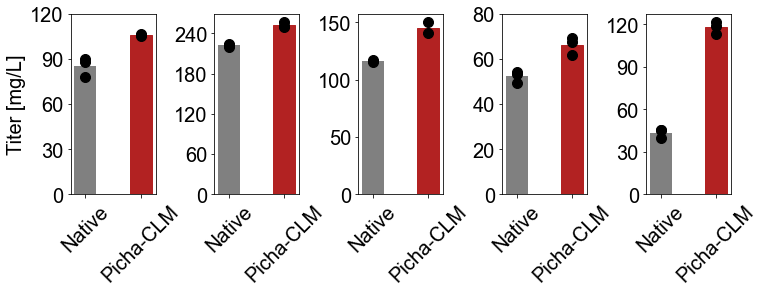

In [22]:
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (10, 3)
f, ax = plt.subplots(1, 5)
f.tight_layout(pad=0.1)
x = [[0, 0, 0], [0.5, 0.5, 0.5]]
x_new = [[0.5, 0.5, 0.5], [0, 0, 0]]
for i in range(5):
    m = MoleculeList[i]
    r = Nr_list[m]
    if m == 'HSA': 
        dat_m = np.array(Avg_SP[m][r[0]])
        print(dat_m)
        barlist = ax[i].bar([0.5 , 0], dat_m, width = 0.2,facecolor= 'gray', alpha = 1)
        ax[i].scatter(x_new,np.transpose(pd.DataFrame(Data_collect[m]).values),100, 'k')
        ax[i].set_yticks(np.arange(0, 121, 30),**hfont)
        ax[i].set_yticklabels(np.arange(0, 121, 30),**hfont)
        for bl in [0]:
            barlist[bl].set_color('firebrick')#'rosybrown'
    else:
        dat_m = np.array(Avg_SP[m][r[0]])
        print(dat_m)
        if i == 0:
            barlist = ax[i].bar([0 , 0.5],dat_m, width = 0.2,facecolor= 'gray')
            ax[i].set_ylabel('Titer [mg/L]', **hfont)
            for bl in [1]:
                barlist[bl].set_color('firebrick')#'rosybrown'
        else:
            barlist = ax[i].bar([0 , 0.5], dat_m, width = 0.2,facecolor= 'gray', alpha = 1)
            for bl in [1]:
                barlist[bl].set_color('firebrick')#'rosybrown'
        if m == 'MSA':
            ax[i].scatter([[0,0], [0.5, 0.5]],
                          np.transpose(pd.DataFrame(Data_collect[m]).values) ,100, 'k')
        else:
            ax[i].scatter(x,
                          np.transpose(pd.DataFrame(Data_collect[m]).values) ,100, 'k')
            
        if m == 'hGH':
            ax[i].set_yticks(np.arange(0, 251,60),**hfont)
            ax[i].set_yticklabels(np.arange(0, 251, 60),**hfont)
        elif m == 'hGCSF':
            ax[i].set_yticks(np.arange(0, 121, 30),**hfont)
            ax[i].set_yticklabels(np.arange(0, 121, 30),**hfont)
        elif m == 'MSA':
            ax[i].set_yticks(np.arange(0, 160, 50),**hfont)
            ax[i].set_yticklabels(np.arange(0, 160, 50),**hfont)
        elif m == 'BSA':
            ax[i].set_yticks(np.arange(0, 81, 20),**hfont)
            ax[i].set_yticklabels(np.arange(0, 81, 20),**hfont)
    
    ax[i].set_xticks([0, 0.5], **hfont)
    ax[i].set_xticklabels(['Native', 'Picha-CLM'], rotation = 45, **hfont)
    
plt.savefig("Comparison_w_Native_Titer_5molecule_org.pdf", dpi = 300, bbox_inches = "tight")  

[1.         1.24665945]
[1.         1.13294484]
[1.         1.25368538]
[1.         1.26578643]
[2.70301579 1.        ]


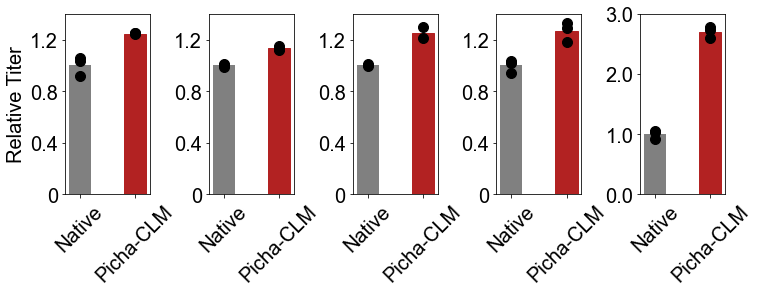

In [26]:
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (10, 3)
f, ax = plt.subplots(1, 5)
f.tight_layout(pad=0.1)
x = [[0, 0, 0], [0.5, 0.5, 0.5]]
x_new = [[0.5, 0.5, 0.5], [0, 0, 0]]
for i in range(5):
    m = MoleculeList[i]
    r = Nr_list[m]
    if m == 'HSA': 
        dat_m = np.array(Avg_SP[m][r[0]])/Avg_SP[m][r[0]][1]
        print(dat_m)
        barlist = ax[i].bar([0.5 , 0], dat_m, width = 0.2,facecolor= 'gray', alpha = 1)
        ax[i].scatter(x_new,np.transpose(pd.DataFrame(Data_collect[m]).values)/Avg_SP[m][r[0]][1] ,100, 'k')
        ax[i].set_yticks(np.arange(0, 3.1, 1),**hfont)
        ax[i].set_yticklabels(np.arange(0, 3.1, 1),**hfont)
        for bl in [0]:
            barlist[bl].set_color('firebrick')#'rosybrown'
    else:
        dat_m = np.array(Avg_SP[m][r[0]])/Avg_SP[m][r[0]][0]
        print(dat_m)
        if i == 0:
            barlist = ax[i].bar([0 , 0.5],dat_m, width = 0.2,facecolor= 'gray')
            ax[i].set_ylabel('Relative Titer', **hfont)
            for bl in [1]:
                barlist[bl].set_color('firebrick')#'rosybrown'
        else:
            barlist = ax[i].bar([0 , 0.5], dat_m, width = 0.2,facecolor= 'gray', alpha = 1)
            for bl in [1]:
                barlist[bl].set_color('firebrick')#'rosybrown'
        if m == 'MSA':
            ax[i].scatter([[0,0], [0.5, 0.5]],
                          np.transpose(pd.DataFrame(Data_collect[m]).values)/Avg_SP[m][r[0]][0] ,100, 'k')
        else:
            ax[i].scatter(x,
                          np.transpose(pd.DataFrame(Data_collect[m]).values/Avg_SP[m][r[0]][0]) ,100, 'k')
        
        ax[i].set_ylim([0, 1.4])
        ax[i].set_yticks(np.arange(0, 1.3, 0.4),**hfont)
        ax[i].set_yticklabels([0, 0.4, 0.8,1.2],**hfont)
#         if m == 'hGH':
#             ax[i].set_yticks(np.arange(0, 251,60),**hfont)
#             ax[i].set_yticklabels(np.arange(0, 251, 60),**hfont)
#         elif m == 'hGCSF':
#             ax[i].set_yticks(np.arange(0, 121, 30),**hfont)
#             ax[i].set_yticklabels(np.arange(0, 121, 30),**hfont)
#         elif m == 'MSA':
#             ax[i].set_yticks(np.arange(0, 160, 50),**hfont)
#             ax[i].set_yticklabels(np.arange(0, 160, 50),**hfont)
#         elif m == 'BSA':
#             ax[i].set_yticks(np.arange(0, 81, 20),**hfont)
#             ax[i].set_yticklabels(np.arange(0, 81, 20),**hfont)
    
    ax[i].set_xticks([0, 0.5], **hfont)
    ax[i].set_xticklabels(['Native', 'Picha-CLM'], rotation = 45, **hfont)
    
plt.savefig("Comparison_w_Native_Titer_5molecule.pdf", dpi = 300, bbox_inches = "tight")  

In [ ]:
# params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
# hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
# plt.rcParams.update(params)
# plt.rcParams["figure.figsize"] = (8, 3)
# f, ax = plt.subplots(1, 3)
# f.tight_layout(pad=0.1)
# x = [[0, 0, 0], [0.5, 0.5, 0.5]]
# x_new = [[0.5, 0.5, 0.5], [0, 0, 0]]
# for i in range(3):
#     m = MoleculeList[i]
#     r = Nr_list[m]
#     if m == 'HSA':
#         barlist = ax[i].bar([0.5 , 0], Avg_SP[m][r[0]], width = 0.2,facecolor= 'gray', alpha = 1)
#         ax[i].scatter(x_new,np.transpose(pd.DataFrame(Data_collect[m]).values) ,100, 'k')
#         ax[i].set_yticks(np.arange(0, 121, 30),**hfont)
#         ax[i].set_yticklabels(np.arange(0, 121, 30),**hfont)
#         for bl in [0]:
#             barlist[bl].set_color('firebrick')#'rosybrown'
#     else:
        
#         if i == 0:
#             barlist = ax[i].bar([0 , 0.5], Avg_SP[m][r[0]], width = 0.2,facecolor= 'gray')
#             ax[i].set_ylabel('Titer [mg/L]', **hfont)
#             for bl in [1]:
#                 barlist[bl].set_color('firebrick')#'rosybrown'
#         else:
#             barlist = ax[i].bar([0 , 0.5], Avg_SP[m][r[0]], width = 0.2,facecolor= 'gray', alpha = 1)
#             for bl in [1]:
#                 barlist[bl].set_color('firebrick')#'rosybrown'
        
#         ax[i].scatter(x,np.transpose(pd.DataFrame(Data_collect[m]).values) ,100, 'k')
#         if m == 'hGH':
#             ax[i].set_yticks(np.arange(0, 251,60),**hfont)
#             ax[i].set_yticklabels(np.arange(0, 251, 60),**hfont)
#         elif m == 'hGCSF':
#             ax[i].set_yticks(np.arange(0, 121, 30),**hfont)
#             ax[i].set_yticklabels(np.arange(0, 121, 30),**hfont)
    
#     ax[i].set_xticks([0, 0.5], **hfont)
#     ax[i].set_xticklabels(['Native', 'Picha-CLM'], rotation = 45, **hfont)
    
# # plt.savefig("Comparison_w_Native_Titer.pdf", dpi = 300, bbox_inches = "tight")  

In [ ]:
Data_collect['MSA']